In [32]:
import torch
import numpy
from dataset import get_fnirs_dataloader


In [33]:
from torch.utils.data import DataLoader
from dataset import *
dataset = ONRData()

train_loader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=2)
real_fnirs = []
labels = []
real_ones = []
real_zeros = []
for i, (data, label) in enumerate(train_loader):
    real_fnirs.append(data.to('cpu'))
    labels.append(label.to('cpu'))
    if label == 1:
        real_ones.append(data.to('cpu'))
    else:    
        real_zeros.append(data.to('cpu'))

real_fnirs = torch.cat(real_fnirs, dim=0).to('cpu')

# add channel dimension

print(real_fnirs.shape)


torch.Size([1534, 4, 12, 8])


In [34]:
synthetic_0 = torch.load('diffusion_results/final_samples/class_0_samples.pt').to('cpu')
synthetic_1 = torch.load('diffusion_results/final_samples/class_1_samples.pt').to('cpu')
all_synthetic = torch.cat([synthetic_0, synthetic_1], dim=0).to('cpu')
synth_labels = torch.cat([torch.zeros(synthetic_0.shape[0]), torch.ones(synthetic_1.shape[0])], dim=0).to('cpu')


C:\Users\Alex\AppData\Local\Temp\ipykernel_57308\2510144129.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  synthetic_0 = torch.load('diffusion_results/final_samples/cla

ValueError: X has 109824 features, but PCA is expecting 384 features as input.

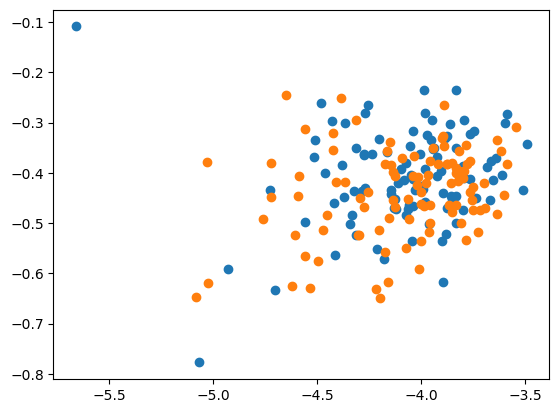

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

real_fnirs = real_fnirs.numpy()
synthetic_0 = synthetic_0.numpy()
synthetic_1 = synthetic_1.numpy()
all_synthetic = all_synthetic.numpy()

real_fnirs = real_fnirs.reshape(real_fnirs.shape[0], -1)
synthetic_0 = synthetic_0.reshape(synthetic_0.shape[0], -1)
synthetic_1 = synthetic_1.reshape(synthetic_1.shape[0], -1)
all_synthetic = all_synthetic.reshape(all_synthetic.shape[0], -1)
real_ones = torch.cat(real_ones, dim=0).to('cpu').numpy().reshape(real_ones[0].shape[0], -1)
real_zeros = torch.cat(real_zeros, dim=0).to('cpu').numpy().reshape(real_zeros[0].shape[0], -1)
all = np.concatenate([real_fnirs, synthetic_0, synthetic_1], axis=0)
pca = PCA(n_components=2)
tsne = TSNE(n_components=2)

pca.fit(all)
all_tsne = tsne.fit_transform(all)

for d in [synthetic_0, synthetic_1, real_ones, real_zeros]:
    d_pca = pca.transform(d)
    plt.scatter(d_pca[:, 0], d_pca[:, 1], label=f'{d.shape[0]} samples PCA')
plt.legend
plt.show()

for d, label in zip([synthetic_0, synthetic_1, real_ones, real_zeros], ['Synthetic 0', 'Synthetic 1', 'Real Ones', 'Real Zeros']):
    d_tsne = tsne.fit_transform(d)
    plt.scatter(d_tsne[:, 0], d_tsne[:, 1], label=f'{label} t-SNE')
plt.legend()
plt.show()











